- 타이완 파산 신청 데이터
- y값이 파산 유무, 92개 정도 컬럼이 있다. 해당 컬럼의 파산에 대해서 설명한 피처들

- 92개의 피처중에서 실제 파산과 연관이 있는 피처는 무엇인지?
- 그동안 배웠던 방법으로 본인들이 직접 정리해 보시면서 어떤 피처가 최적의 피처인지를 선정하고 그랬을 때 본인한 선택 모델의 성능까지도 정리해 주시면 됩니다.

## 필수과제1.1
- 해당 로우데이터의 시각화 및 탐색, 기본적인 EDA 필수

## 필수과제1.2
- 다양한 피처선정을 배웠으니 최대한 모두 사용해서 어떤 피처를 선택할지를 꼭 정리하기!

## 필수과제1.3
- 선정된 피처로 모델을 돌려서 ( 모델은 기본 베이스로만 하셔도 됩니다. ) 단 3개 이상은 모델을 사용하여서, 평가지표 정확도, 정밀도, f1, 재현율 다 정리하여서 어떤 모델과 어떤 피처가 최적인지를 공유해 주세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 경로 설정
file_path = "data.csv"

# CSV 파일을 DataFrame으로 불러오기
data = pd.read_csv(file_path)

In [3]:
# 데이터 확인하기
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
# 기본 정보 확인
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
print(data.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

In [6]:
# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # 결측치가 있는 열만 출력

Series([], dtype: int64)


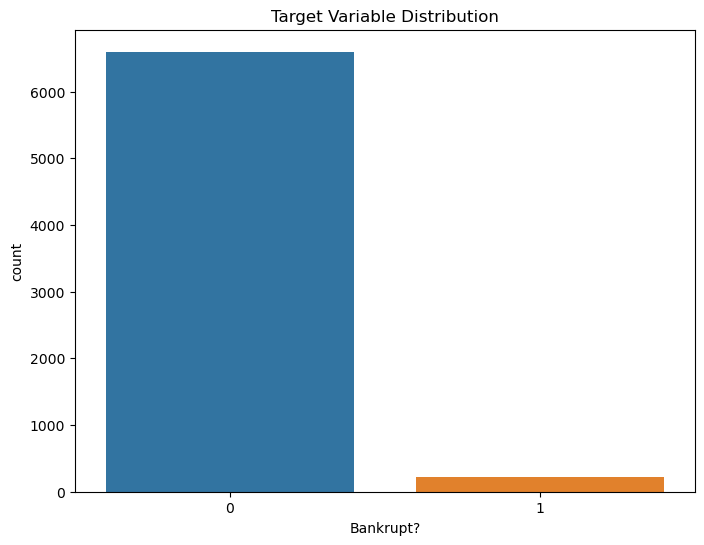

In [7]:
# 타겟 변수 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data['Bankrupt?'])
plt.title('Target Variable Distribution')
plt.show()

C:\Users\haeun\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  after removing the cwd from sys.path.


<Figure size 1400x1000 with 0 Axes>

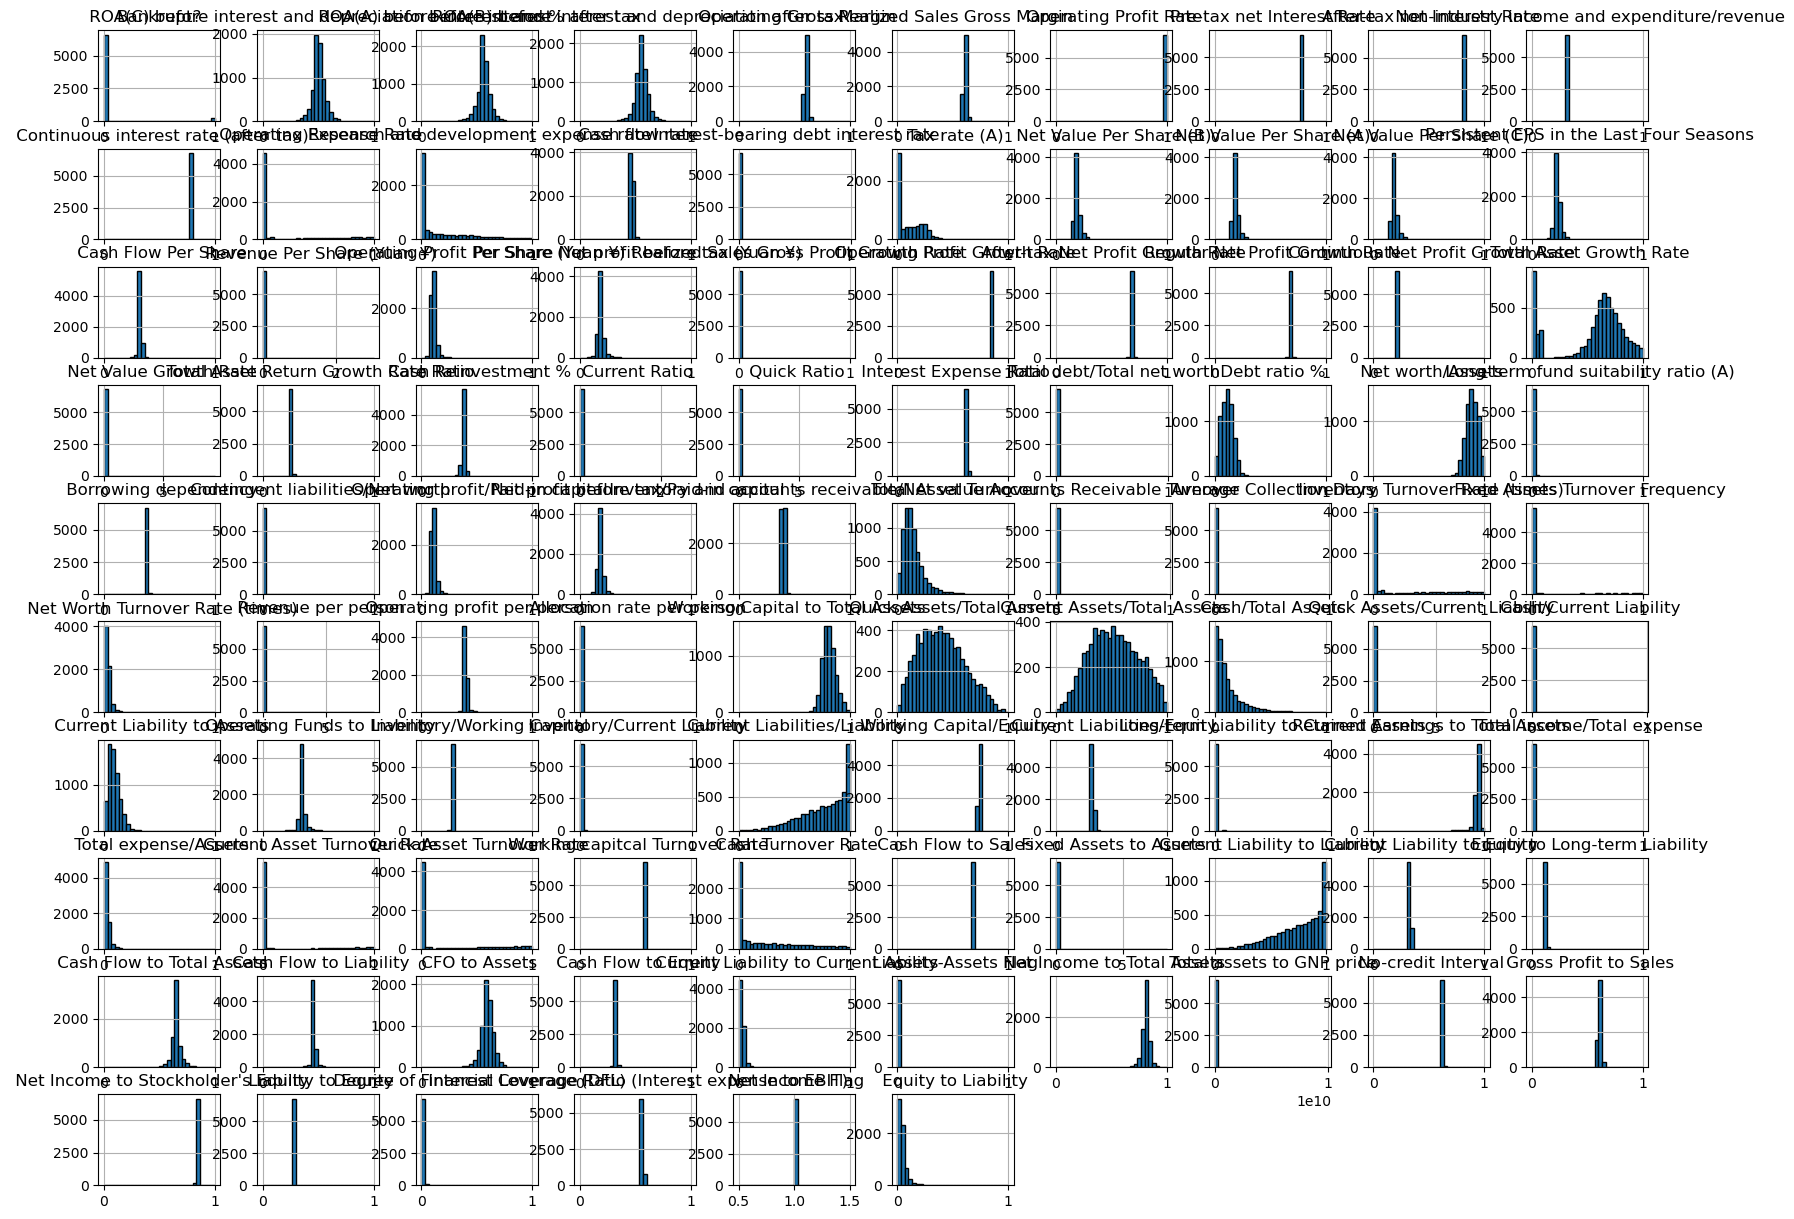

In [8]:
# 주요 피처들의 분포 시각화
plt.figure(figsize=(14, 10))
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()

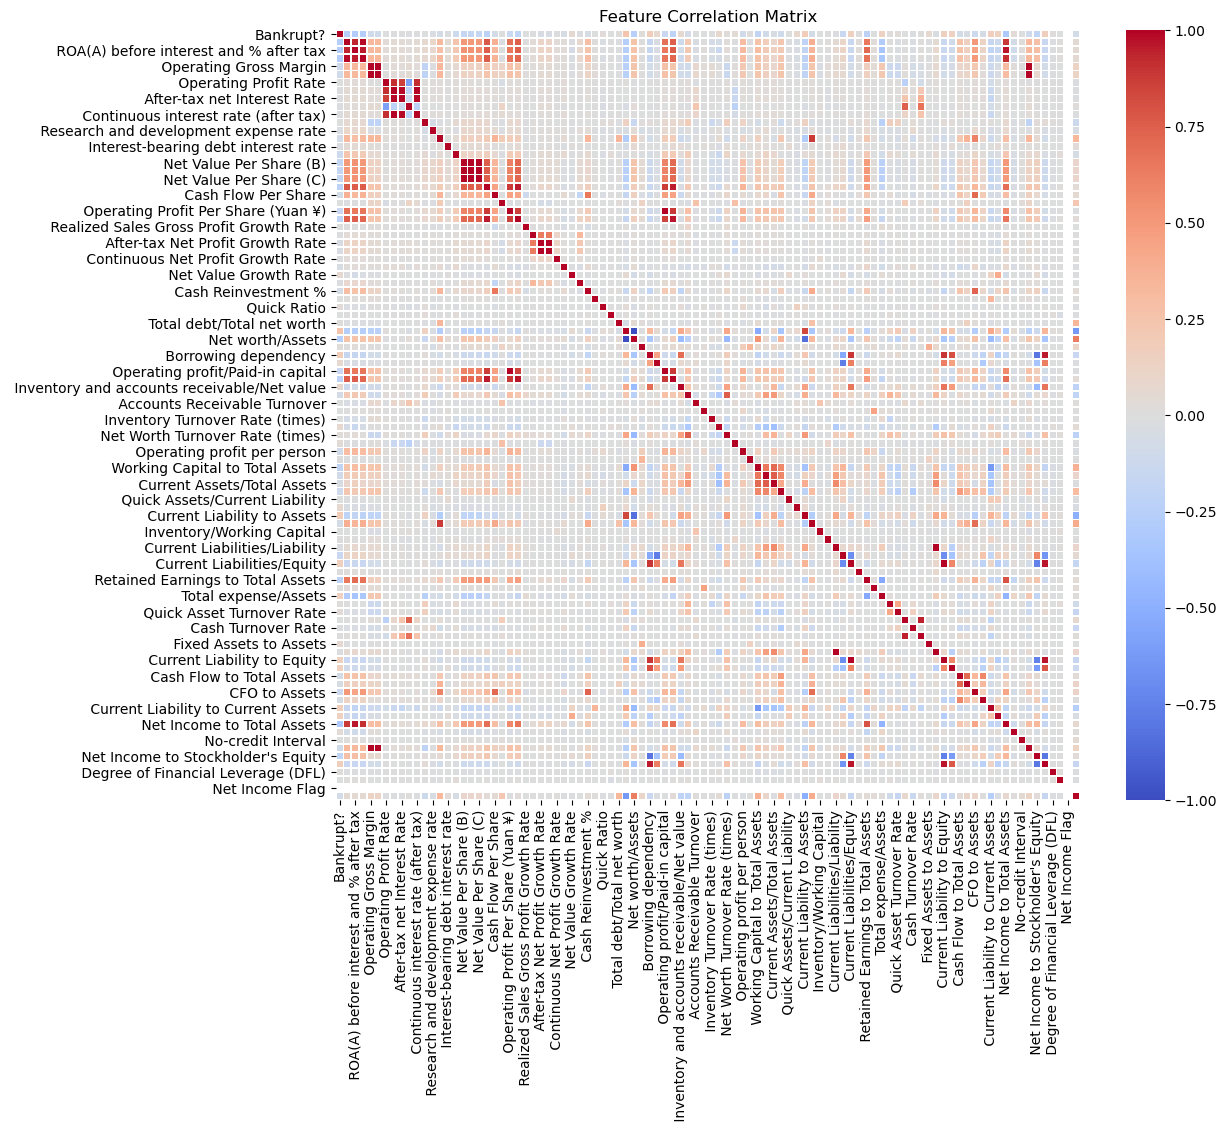

In [9]:
#피처 간의 상관관계 분석
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [14]:
# 타겟 변수와 상관관계가 높은 피처 상위 n개
corr_with_target = corr_matrix['Bankrupt?'].sort_values(ascending=False)[:10]
print(corr_with_target)

Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
Name: Bankrupt?, dtype: float64


In [15]:
# 타겟 변수와 상관관계가 낮은 피처 상위 n개
corr_with_target = corr_matrix['Bankrupt?'].sort_values(ascending=True)[:10]
print(corr_with_target)

 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Working Capital to Total Assets                           -0.193083
Name: Bankrupt?, dtype: float64


In [18]:
# 타겟 변수와 상관관계(절대값)가 높은 피처 상위 n개
corr_with_target = corr_matrix['Bankrupt?'].abs().sort_values(ascending=False)[:10]
print(corr_with_target)

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
Name: Bankrupt?, dtype: float64


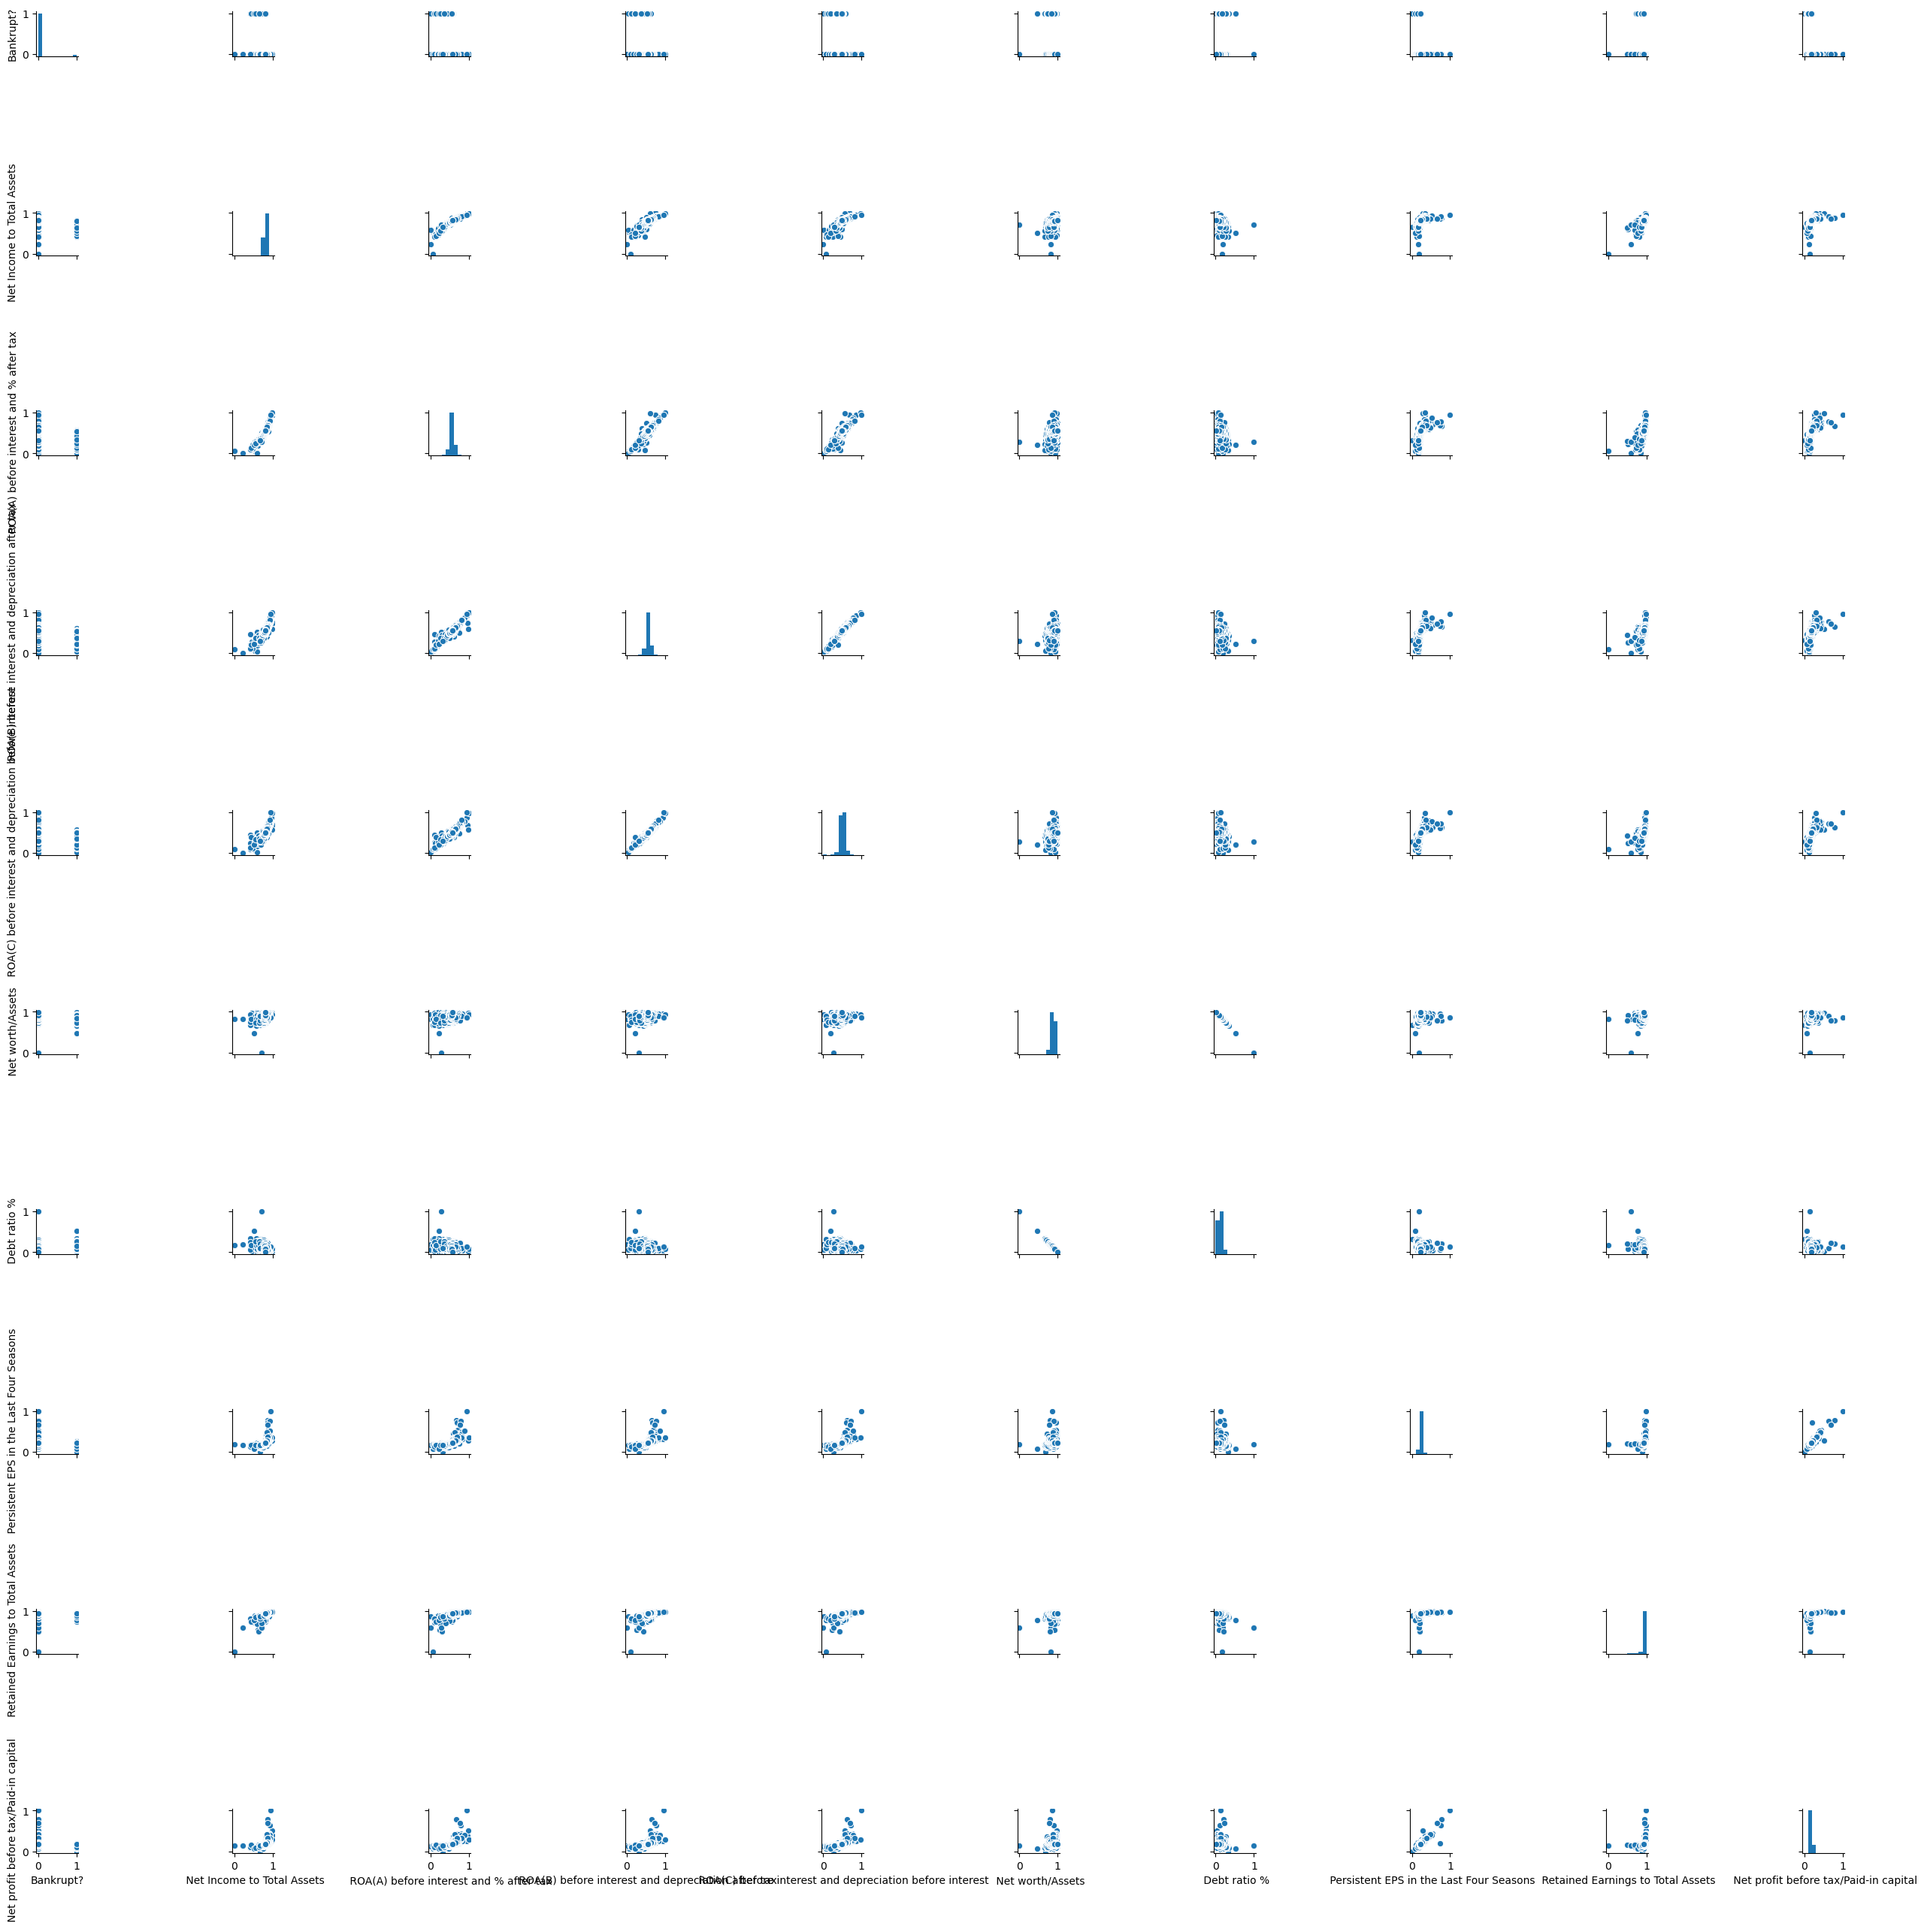

In [19]:
# 상위 피처들에 대한 시각화
top_features = corr_with_target.index
sns.pairplot(data[top_features])
plt.show()